<a href="https://www.kaggle.com/code/hipparkarrahul18/shared-electric-cycle-demand-analysis?scriptVersionId=198635088" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Defining Problem Statement and Analysing basic metrics

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How I can help here?**

The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

**Concept Used:**

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation library built on the top of the matplotlib
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px
import datetime as dt
from scipy.stats import ttest_ind,levene,shapiro,f_oneway,chi2_contingency
from statsmodels.graphics.gofplots import qqplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/yuludata/bike_sharing.csv


## Importing the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/yuludata/bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Basic Analysis

### Shape of the data

In [3]:
df.shape

(10886, 12)

**Analysis**:

1. Shape of dataframe is 10886 * 12
2. Number of rows = 10886
3. Number of columns = 12

### First 5 rows

In [4]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Columns in a Dataframe

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Data-type of all attributes or concise summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Inference:**

1. All the columns execpt datetime are numerical columns.
2. There are no missing values in the dataframe.
3. 'datetime' attribute is of object type, we should convert it to datetime type.
4. There are various categorical columns (season, holiday, workingday, weather) that appear to be integer type, we should
   convert them to categorical type.

### Statistical Summary

**Statistical Summary of Numeric columns**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


**Inference:**
1. We don't see a significant difference between mean and median for the independent variables such as temp, atemp, humidity
   and windspeed.
2. This suggests a lesser presence of outliers or skewness for these variables, but we can't be sure. We will further check for
   outliers using box plot.
3. It's difficult to comment on distribution of the dependent variables, count of casual and registered users leverging the
   shared mobility service. We will revisit it through visual plots.

**Statistical Summary of Object Columns**

In [8]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


# Non-Graphical Analysis: Value counts and unique attributes

## Unique Values

In [9]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

## Value Counts

In [10]:
for col in df.columns:
    value_count=df[col].value_counts(normalize=True)*100
    print(f"----Value counts of {col} column ---- ")
    print()
    print(value_count.round(2))
    print()
    print()

----Value counts of datetime column ---- 

2011-01-01 00:00:00    0.01
2012-05-01 21:00:00    0.01
2012-05-01 13:00:00    0.01
2012-05-01 14:00:00    0.01
2012-05-01 15:00:00    0.01
                       ... 
2011-09-02 04:00:00    0.01
2011-09-02 05:00:00    0.01
2011-09-02 06:00:00    0.01
2011-09-02 07:00:00    0.01
2012-12-19 23:00:00    0.01
Name: datetime, Length: 10886, dtype: float64


----Value counts of season column ---- 

4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64


----Value counts of holiday column ---- 

0    97.14
1     2.86
Name: holiday, dtype: float64


----Value counts of workingday column ---- 

1    68.09
0    31.91
Name: workingday, dtype: float64


----Value counts of weather column ---- 

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64


----Value counts of temp column ---- 

14.76    4.29
26.24    4.16
28.70    3.92
13.94    3.79
18.86    3.73
22.14    3.70
25.42    3.70
16.40    3.67
22.96    3.63
27.0

# Data Preprocessing

## Handling missing values

In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Inference:**

There are no missing values in a given dataframe.

## Data-type conversion

 **Converting datetime column to type datetime from object type**

In [12]:
df['datetime']=pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

**Converting season column from numerical to categorical**

In [13]:
def season_type(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [14]:
df['season']=df['season'].apply(lambda x:season_type(x))
df['season']

0        spring
1        spring
2        spring
3        spring
4        spring
          ...  
10881    winter
10882    winter
10883    winter
10884    winter
10885    winter
Name: season, Length: 10886, dtype: object

**Converting season,weather,holiday and workingday columns into categorical**

In [15]:
df['season']= pd.Categorical(df['season'])
df['weather']=pd.Categorical(df['weather'])
df['holiday']=pd.Categorical(df['holiday'])
df['workingday']=pd.Categorical(df['workingday'])

In [16]:
df[['datetime','season','weather','holiday','workingday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   weather     10886 non-null  category      
 3   holiday     10886 non-null  category      
 4   workingday  10886 non-null  category      
dtypes: category(4), datetime64[ns](1)
memory usage: 128.3 KB


**Statistical Summary after data-type conversion**

In [17]:
#Statistical summary of  numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


In [18]:
#Statistical summary of  categorical columns

df.describe(include='category').T

,count,unique,top,freq
season,10886,4,winter,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


## Handling outliers

**Outlier detection using the z-score method**

* We can detect outliers in numeric column using the z-score.
* If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
* z score= (x-mean)/std.deviation.

In [19]:
outliers={}
for col in df.select_dtypes(include=np.number):
    
    #finding z-score for each value in a column
    z_score= np.abs((df[col]-df[col].mean()))/df[col].std()
    
    # if the z score of a value is a grater than 3 than the value is outlier
    column_outliers=df[z_score > 3][col]
    
    outliers[col]=column_outliers
    
for col,outlier_values in outliers.items():
    print(f"Outliers for {col} column")
    print(outlier_values)
    print()

Outliers for temp column
Series([], Name: temp, dtype: float64)

Outliers for atemp column
Series([], Name: atemp, dtype: float64)

Outliers for humidity column
1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64

Outliers for windspeed column
265      39.0007
613      39.0007
750      43.9989
752      40.9973
753      40.9973
          ...   
9481     43.0006
9482     43.0006
9484     39.0007
9754     39.0007
10263    43.0006
Name: windspeed, Length: 67, dtype: float64

Outliers for casual column
1384     219
1385     240
1935     196
2127     195
2129     206
        ... 
10226    195
10227    262
10228    292
10229    304
10230    260
Name: casual, Length: 292, dtype: int64

Outliers for registered column
6611     623
6634     614
6635     638
6649     628
6658     642
        ... 
10702  

**Observations:**
1. There no outliers in 'temp' and 'atemp' column.
2. Outliers are evident within the 'humidity' and 'windspeed' columns based on the observations.
3. Outliers are noticeable in the counts of casual and registered users, though drawing definite conclusions necessitates analyzing their relationship with independent variables..


# Univariate Analysis

## Distribution of Working day

In [20]:
workingday_df=df.groupby(['workingday']).agg(number_of_cycles_rented=('count','sum')).reset_index()
workingday_df

,workingday,number_of_cycles_rented
0,0,654872
1,1,1430604


In [21]:
labels= workingday_df['workingday']
values= workingday_df['number_of_cycles_rented']

#create pie chart
# Create pie chart
colors = ['#C0E0DE','#4F7CAC']

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Working day",
                xaxis=dict(title='Working Day',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Cycles rented',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()


**Insight**:

On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.

## Distribution of Season

In [22]:
season_df=df.groupby(['season']).agg(number_of_cycles_rented=('count','sum')).reset_index()
season_df

,season,number_of_cycles_rented
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


In [23]:
labels= season_df['season']
values= season_df['number_of_cycles_rented']

#create pie chart
# Create pie chart
colors = ['#D4D2A5','#FCDEBE','#ddbea9','#ffc8dd']

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Season",
                xaxis=dict(title='Season',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Cycles rented',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**:

1. During the fall season, approximately 30.7% of cycles are rented.
2. In the summer season, around 28.2% of cycles are rented.
3. The winter season records a rental rate of about 26.1% for cycles.
4. The lowest rental rate, at just 15%, is observed in the spring season.

## Distribution of Weather

In [24]:
weather_df=df.groupby(['weather']).agg(number_of_cycles_rented=('count','sum')).reset_index()
weather_df

,weather,number_of_cycles_rented
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [25]:
labels= weather_df['weather']
values= weather_df['number_of_cycles_rented']

#create pie chart
# Create pie chart
colors =  ["#b9e769","#efea5a","#f1c453"]

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Weather types",
                xaxis=dict(title='Weather types',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Cycles rented',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**:

1. Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.
2. In weather condition 2, around 24.3% of cycles are rented.
3. Weather condition 3 has a rental rate of approximately 4.9% for cycles.
4. Weather condition 4 exhibits an exceptionally low rental rate, with only 0.00786% of cycles being rented.

## Hourly Trends in Average Cycle Rentals

In [26]:
hour_df=df.groupby(df['datetime'].dt.hour).agg(average_cycles_rented=('count','mean')).reset_index()
hour_df


,datetime,average_cycles_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


In [27]:
fig = px.line(hour_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(25)))
fig.update_layout(title='Average cycles rented in hourly basis',
                   xaxis_title='Hours',
                   yaxis_title='Average cycles rented')
fig.show()

**Insights**:

1. The highest average count of rental bikes is observed at 5 PM, closely followed by 6 PM and 8 AM. This indicates distinct peak hours during the day when cycling is most popular.
2. Conversely, the lowest average count of rental bikes occurs at 4 AM, with 3 AM and 5 AM also showing low counts. These hours represent the early morning period with the least demand for cycling.
3. Notably, there is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
4. Additionally, there is a decreasing trend in cycle rentals from 5 PM to 11 PM, indicating a gradual decline in demand as the day progresses into the evening and nighttime.

## Montly trend in average cycle rentals

In [28]:
month_df=df.groupby(df['datetime'].dt.month).agg(average_cycles_rented=('count','mean')).reset_index()
month_df

,datetime,average_cycles_rented
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


In [29]:
fig = px.line(month_df, x='datetime', y='average_cycles_rented', markers=True)
fig.update_xaxes(tickvals=list(range(1,13)),ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.update_layout(title='Average cycles rented on monthly basis',
                   xaxis_title='Month',
                   yaxis_title='Average cycles rented')
fig.show()

**Insights**:

1. The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
2. Conversely, the lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
3. Notably, there is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
4. Conversely, a decreasing trend in average bike rentals is observed from October to December due to the onset of winter.

## Distribution of temp, atemp, humidity and windspeed

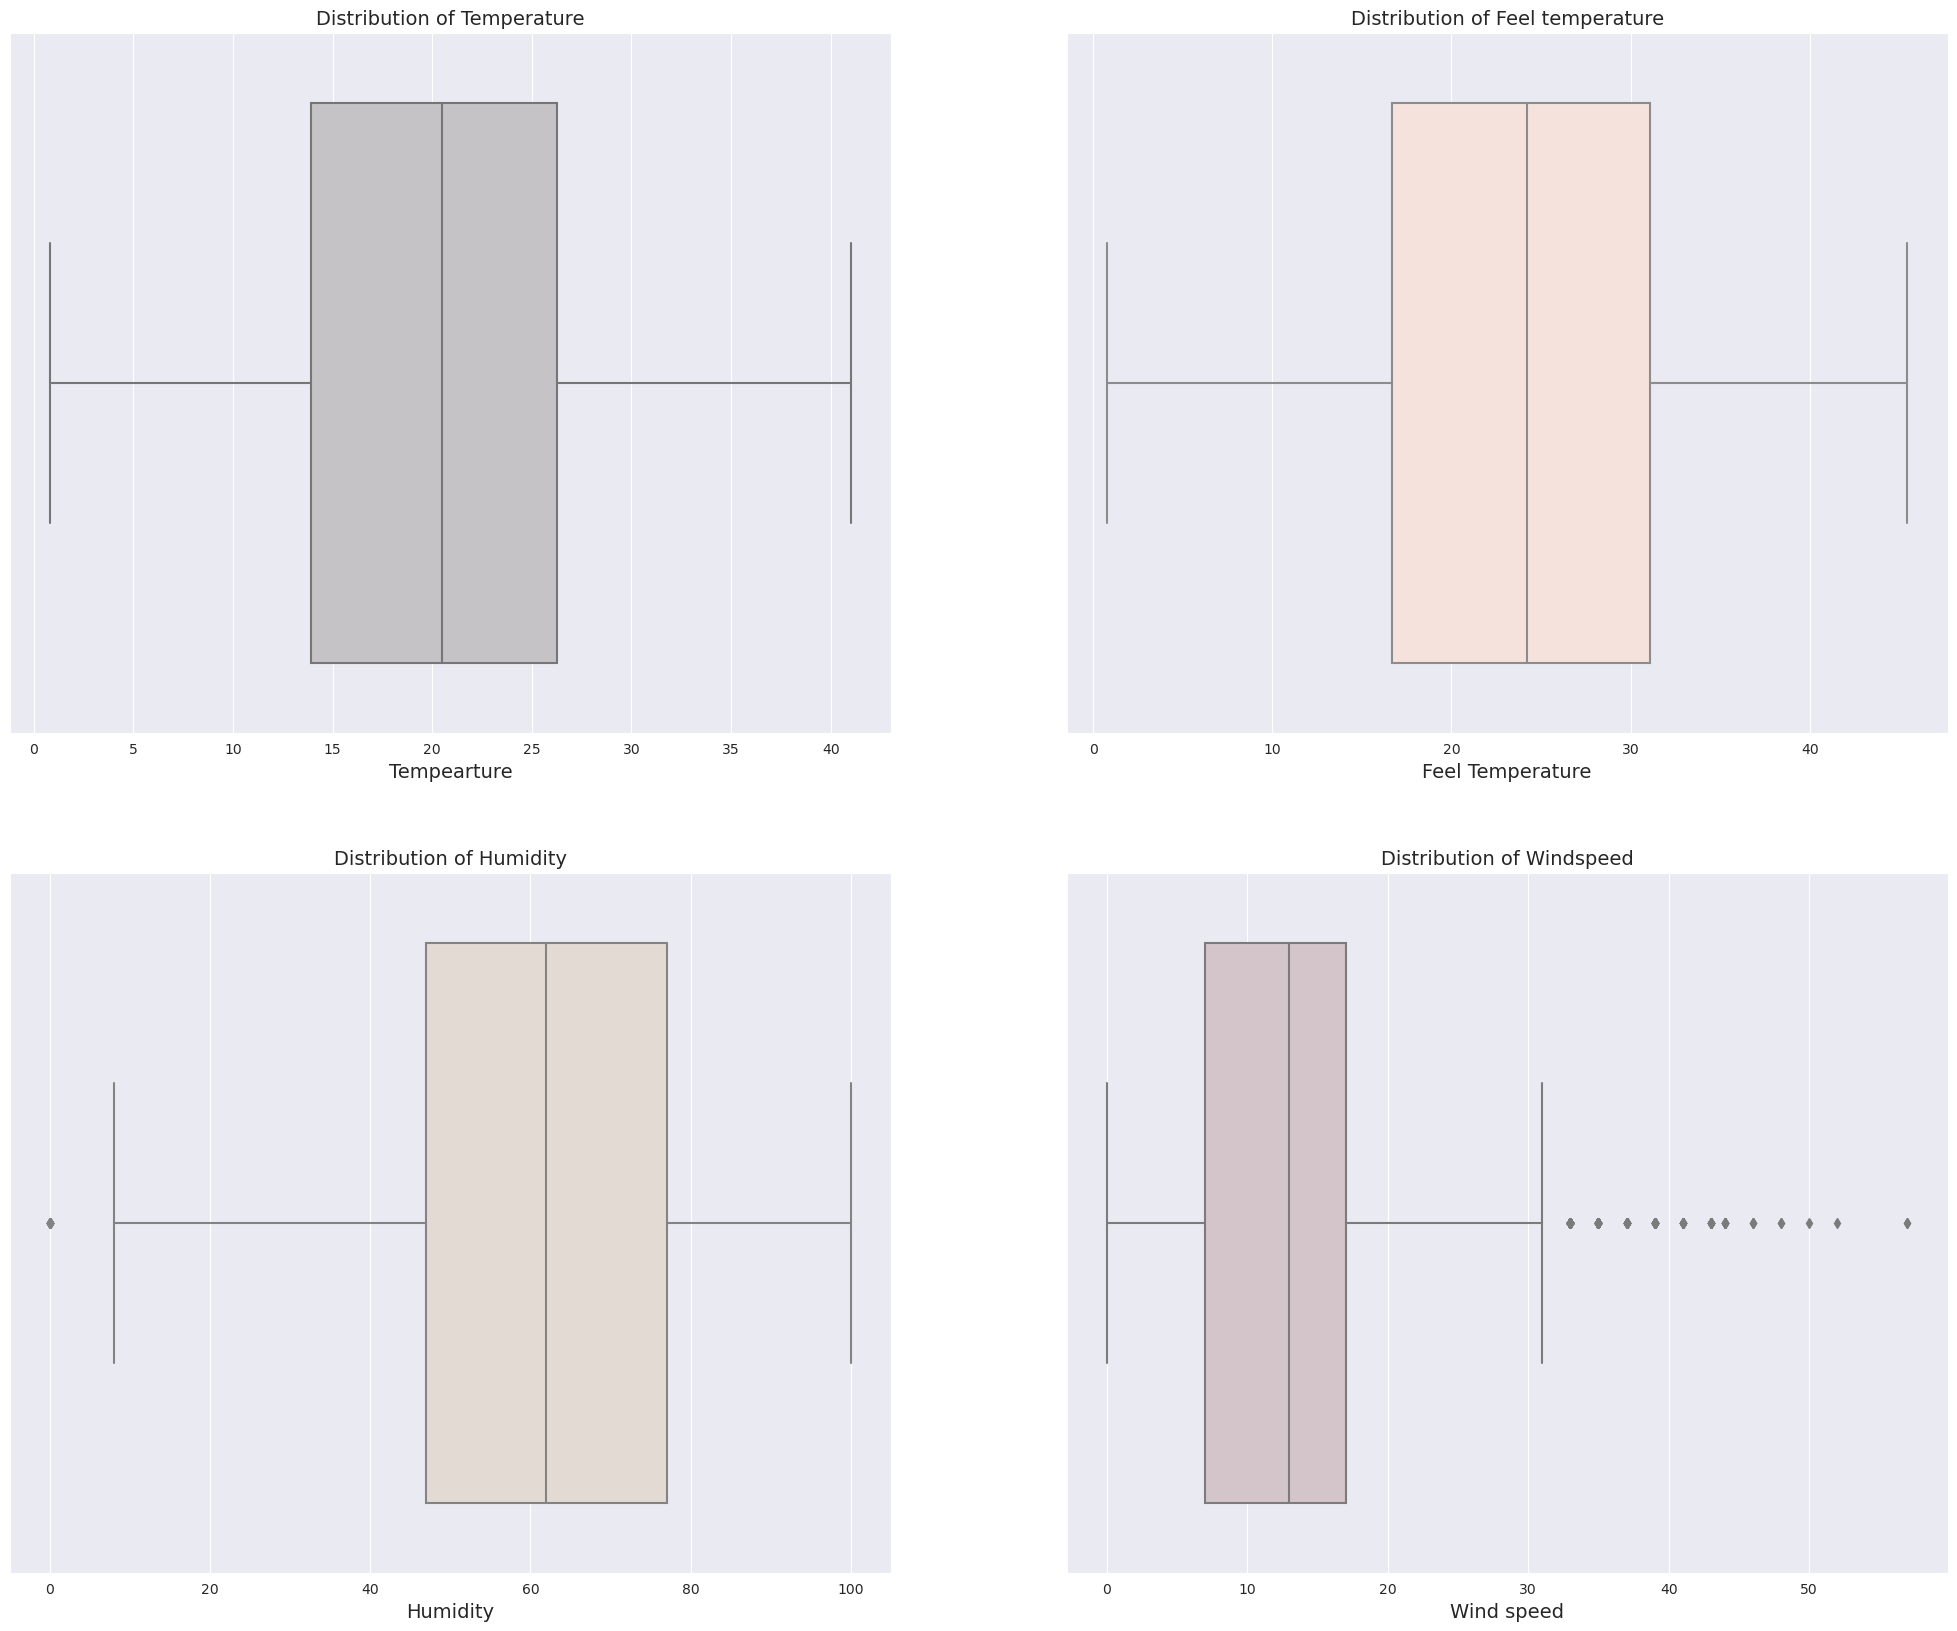

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,20))

# Boxplot for temp column 
plt.subplot(2,2,1)
sns.boxplot(data=df,x='temp',color='#C5C3C6')
plt.xlabel('Tempearture',fontsize=14)
plt.title('Distribution of Temperature',fontsize=14)

#Boxplot for feel temperature
plt.subplot(2,2,2)
sns.boxplot(data=df,x='atemp',color='#F9E0D9')
plt.xlabel('Feel Temperature',fontsize=14)
plt.title('Distribution of Feel temperature',fontsize=14)

#Boxplot for Humidity
plt.subplot(2,2,3)
sns.boxplot(data=df,x='humidity',color='#E6DBD0')
plt.xlabel('Humidity',fontsize=14)
plt.title('Distribution of Humidity',fontsize=14)

#Boxplot for Wind Speed
plt.subplot(2,2,4)
sns.boxplot(data=df,x='windspeed',color='#D6C3C9')
plt.xlabel('Wind speed',fontsize=14)
plt.title('Distribution of Windspeed',fontsize=14)


plt.show()

**Inference**:

1. No outliers are detected in the 'temp' and 'atemp' columns, suggesting that the temperature-related data points fall within the expected range.
2. In the 'humidity' column, a single value is identified as an outlier, implying an unusual humidity measurement distinct from the others.
3. The 'windspeed' column contains 12 outlier values, indicating instances where wind speed measurements significantly deviate from the typical range.

## Distribution of  Casual count, Registered count and Total count

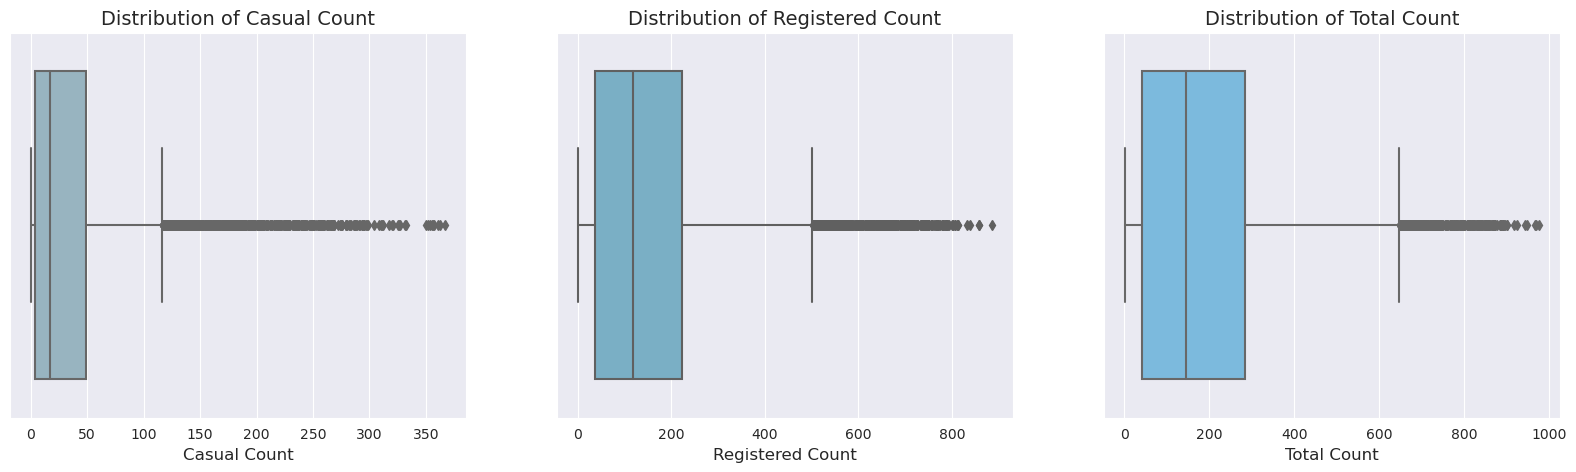

In [31]:
plt.figure(figsize=(20,5))

# Boxplot for temp column 
plt.subplot(1,3,1)
sns.boxplot(data=df,x='casual',color='#91B7C7')
plt.xlabel('Casual Count',fontsize=12)
plt.title('Distribution of Casual Count',fontsize=14)

#Boxplot for feel temperature
plt.subplot(1,3,2)
sns.boxplot(data=df,x='registered',color='#6EB4D1')
plt.xlabel('Registered Count',fontsize=12)
plt.title('Distribution of Registered Count',fontsize=14)

#Boxplot for Humidity
plt.subplot(1,3,3)
sns.boxplot(data=df,x='count',color='#6CBEED')
plt.xlabel('Total Count',fontsize=12)
plt.title('Distribution of Total Count',fontsize=14)


plt.show()


**Inference**:

1. The box plot clearly indicates the presence of outliers in the number of casual and registered users. However, further analysis against independent variables is needed before making definitive comments.
2.  The box plot reveal data skewness. As we proceed, we will decide whether to address outliers or perform variable transformation. In this case, given the significant number of outliers, variable transformation, specifically Log Transformation, seems to be a more appropriate approach.

# Bivariate Analysis

## Distribution of count of rented bikes across working day

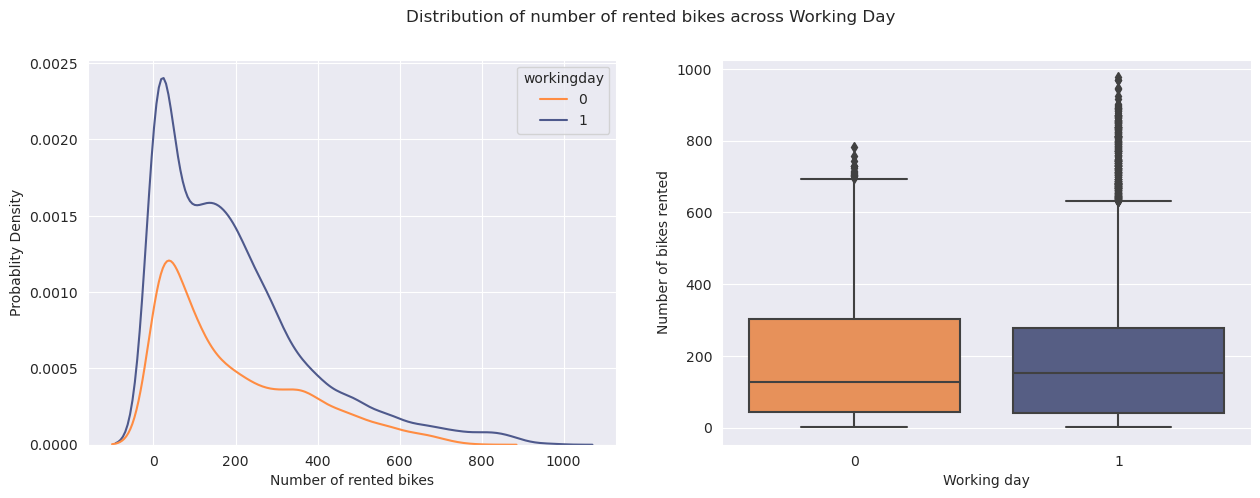

In [32]:
plt.figure(figsize=(15,5))
# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='workingday',palette=['#FF8C42','#4E598C'])
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='workingday',palette=['#FF8C42','#4E598C'])
plt.xlabel('Working day')
plt.ylabel('Number of bikes rented')

plt.suptitle('Distribution of number of rented bikes across Working Day')
plt.show()

**Inference**:

The probability of renting bikes on a working day appears to be higher than on a non-working day, as evidenced by our univariate analysis, where 68.6% of bike rentals occurred on working days compared to 31.4% on non-working days. However, we will further investigate this through hypothesis testing to determine if the working day indeed has a statistically significant effect on the number of cycles rented."

## Distribution of count of rented bikes across Season

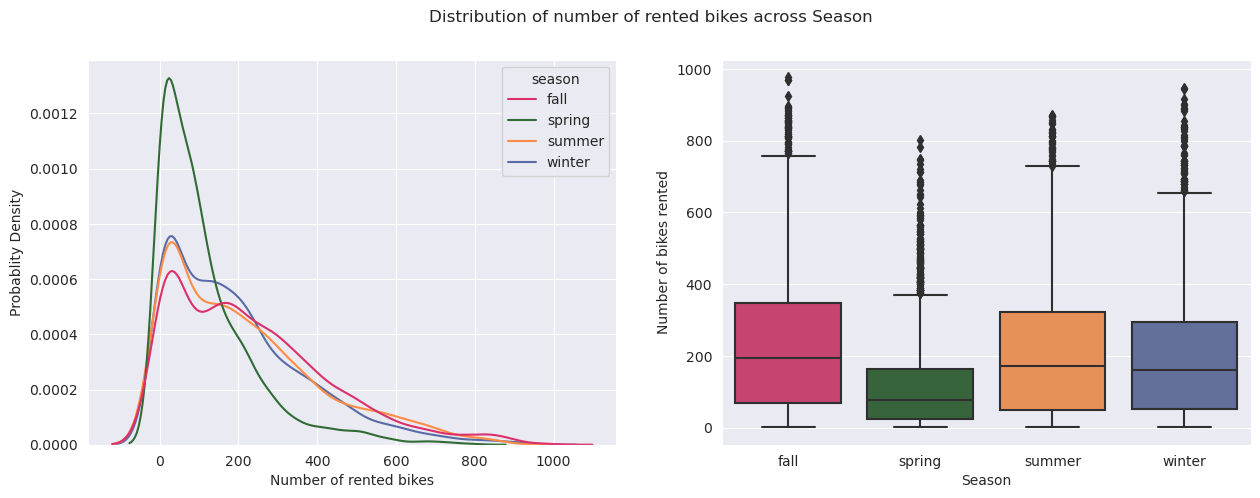

In [33]:
plt.figure(figsize=(15,5))
# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='season',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='season',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Season')
plt.ylabel('Number of bikes rented')

plt.suptitle('Distribution of number of rented bikes across Season')
plt.show()

**Inference**

The probability of renting a bike during the fall season appears to be higher compared to other seasons. Conversely, the probability of renting bikes during the winter and spring seasons is lower in comparison to summer and fall. To investigate this further, we will conduct an ANOVA test to determine if the season has a statistically significant effect on bike rentals.

## Distribution of count of rented bikes across Weather types

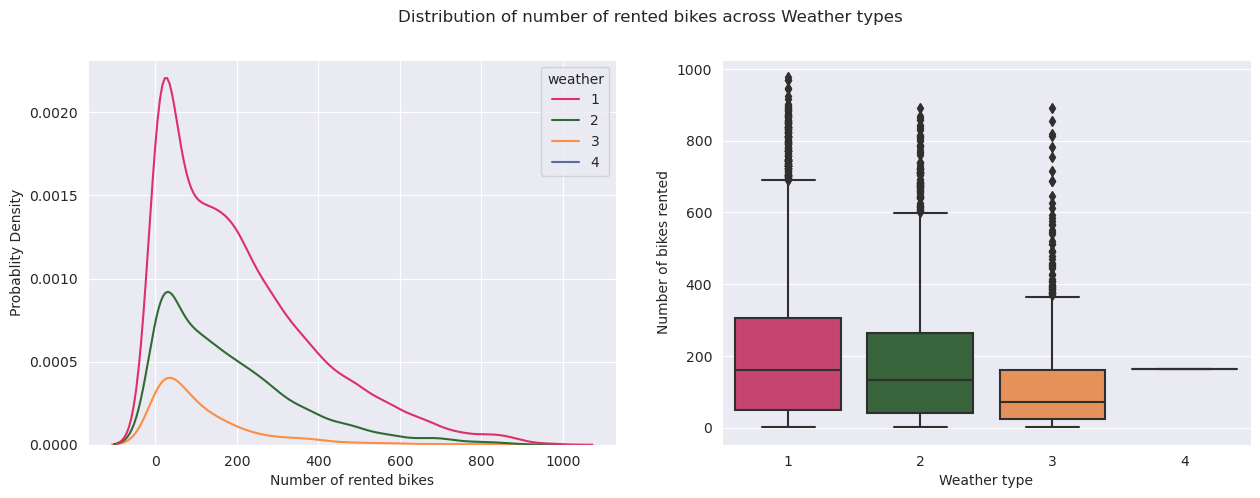

In [34]:
plt.figure(figsize=(15,5))

# KDE plot
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.kdeplot(data=df,x='count',hue='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'],warn_singular=False)
plt.xlabel('Number of rented bikes')
plt.ylabel('Probablity Density')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df,y='count',x='weather',palette=['#DB3069','#306B34','#FF8C42','#586BA4'])
plt.xlabel('Weather type')
plt.ylabel('Number of bikes rented')

plt.suptitle('Distribution of number of rented bikes across Weather types')
plt.show()


**Inference**:

The probability of renting a bike during weather condition 1 appears to be higher than in other weather types. This is supported by our univariate analysis, where approximately 70.8% of bike rentals occur in weather condition 1, while the remaining weather types collectively account for approximately 29% of bike rentals. However, we will further investigate this by conducting an ANOVA test to establish whether weather type indeed has a statistically significant effect on the number of bikes rented.

## Heatmap and Correlation

/tmp/ipykernel_20/336913126.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



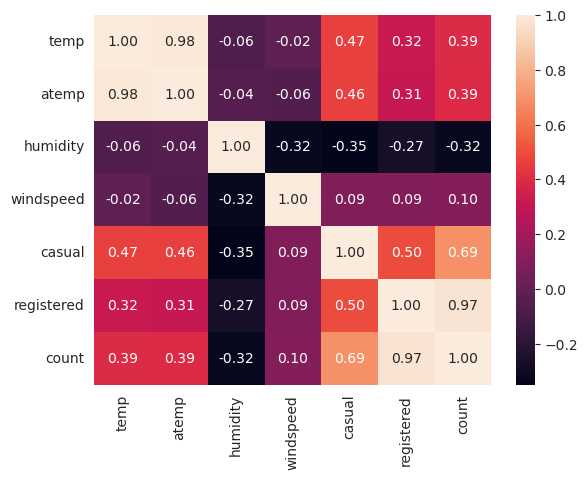

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

**Insights**:
1. The weak positive correlation of 0.39 between temperature and the number of bikes rented suggests that, on average, fewer people prefer to use electric cycles during the daytime between 12 PM to 3 PM. This observation aligns with our univariate analysis, where we discovered that the average number of cycles rented during this time frame was lower compared to other times of the day. A similar correlation pattern is also observed in the case of "feels-like" temperature, reinforcing this trend.
2. The negative correlation between humidity and the number of cycles rented indicates that people tend to avoid using electric bikes during high humidity conditions. This avoidance can be attributed to the discomfort caused by the heavy and sticky air, leading to sweating and a general sense of unease. Moreover, the reduced efficiency of electric bikes in high humidity, resulting in increased air resistance and potential battery performance issues, contributes to the preference for alternative transportation or indoor activities in such conditions.
3. The presence of a weak positive correlation between windspeed and the number of cycles rented indicates that there is a subset of individuals who appear to favor using electric cycles during windy conditions for the sheer enjoyment of the experience. While this preference contributes to a slight increase in bike rentals on windier days, it's essential to recognize that this effect is not particularly strong, as indicated by the weak correlation. This suggests that the enjoyment of cycling in windy conditions is a relatively niche preference among riders.


# Hypothesis Testing

## Does Working day has an effect on the number of bikes rented?

### Formulating Null and Alternative Hypotheses

To answer the above question we first set up Null and Alternate Hypothesis:

* ***H0 : Working day does not have an effect on number of cycles rented***
* ***Ha: Working day does have an effect on number of cycles rented***

**Solution:** To test the above hypothesis, we use **Two sample T Test**

### Assumptions of a T Test


1. Independence : The observations in one sample are independent of the observations in the other sample.
2. Normality : Both samples are approximately normally distributed.
3. Homogenity of Variances : Both samples have approximately the same variance.
4. Random Sampling : Both samples were obtained using random sampling method


### Normality Check: Wilkin Shapiron Test

* To conduct the above experiment, we shall take the samples randomly, and also the number of electric cyles rented on Working day and non working day are independent.
* We however have to check for Normality and homogenity of Variances

**Generate a sample of 300 bike rentals, randomly selected from both working days and non-working days**

In [36]:
workingday_sample=df[df['workingday']==1]['count'].sample(300)
nonworkingday_sample=df[df['workingday']==0]['count'].sample(300)

**To check normality we can use histogram**

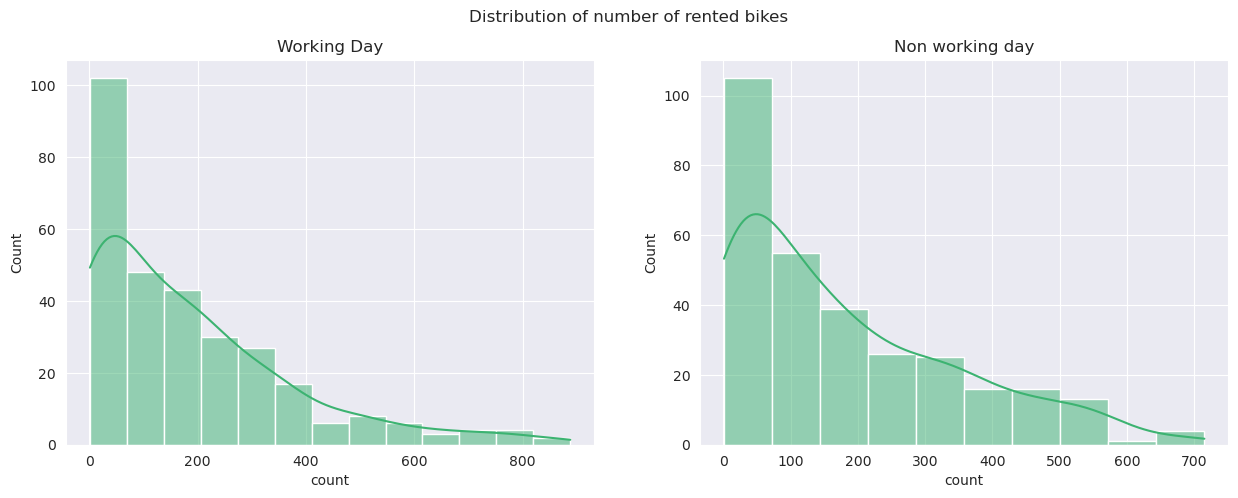

In [37]:
plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(workingday_sample,kde=True,color='mediumseagreen')
plt.title('Working Day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(nonworkingday_sample,kde=True,color='mediumseagreen')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()

**Inference**:

1. The counts of rented cycles on both working and non-working days do not follow a normal distribution.
2. We can try to convert the distribution to normal by applying log transformation

**Converting sample distribution to normal by applying log transformation**

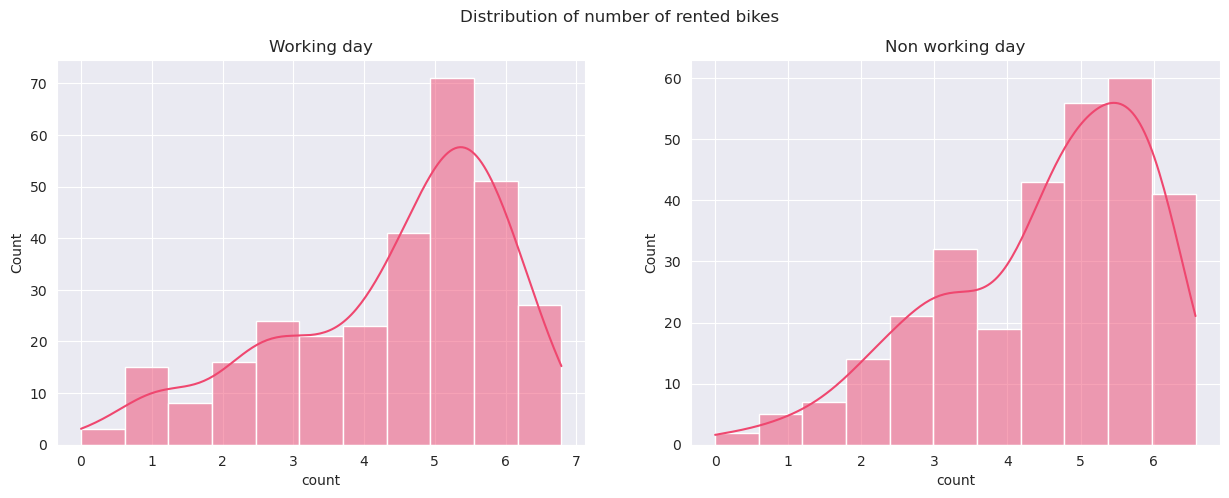

In [38]:
plt.figure(figsize=(15,5))

#histogram for working day sample
plt.subplot(1,2,1)
sns.histplot(np.log(workingday_sample),kde=True,color='#ef476f')
plt.title('Working day')

#histogram for non working day sample
plt.subplot(1,2,2)
sns.histplot(np.log(nonworkingday_sample),kde=True,color='#ef476f')
plt.title('Non working day')

plt.suptitle('Distribution of number of rented bikes')
plt.show()

**Inference:**
Upon implementing a log transformation on our continuous variables, we observed a substantial improvement in achieving a distribution that closely resembles normality for both the workingday_sample and nonworkingday_sample

**We will now conduct the Wilk-Shapiro Test to assess the normality of the log-normal distribution obtained in the previous step**

**Performing the Wilk-Shapiro test for the workingday sample**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The Working day samples are normally distributed***
* ***Ha: The Working day samples are not normally distributed***

In [39]:
test_stat,p_value= shapiro(np.log(workingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The working day samples are not normally distributed ")
else:
 print("Fail to Reject Ho: The working day samples are normally distributed")

test stat : 0.9212654829025269
p value : 1.8064360771119503e-11
Reject Ho: The working day samples are not normally distributed 


**Inference**:
* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis. 
* We have sufficient evidence to say that the **working day sample data** does not come from normal distribution.

**Performing the Wilk-Shapiro test for the non-working day sample**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The non working day samples are normally distributed***
* ***Ha: The non working day samples are not normally distributed***

In [40]:
test_stat,p_value= shapiro(np.log(nonworkingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The non working day samples are not normally distributed ")
else:
 print("Fail to Reject Ho: The non working day samples are normally distributed")

test stat : 0.9311106204986572
p value : 1.4355289179590613e-10
Reject Ho: The non working day samples are not normally distributed 


**Inference**:
* From the above output, we see that the p value is far less than 0.05, Hence we reject the null hypothesis. 
* We have sufficient evidence to say that the **non working day sample data** does not come from normal distribution.

### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : Variance is equal in both working day count and non working day count samples***
* ***Ha: Variances is not equal***


In [41]:
test_stat,p_value= levene(np.log(workingday_sample),np.log(nonworkingday_sample))
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal ")
else:
 print("Fail to Reject Ho: Variance is equal in both working day count and non working day count samples")

test stat : 1.808075818977907
p value : 0.1792490167579995
Fail to Reject Ho: Variance is equal in both working day count and non working day count samples


**Inference**:
* Since pvalue is not less than 0.05, we fail to reject null hypothesis.
* This means we do not have sufficient evidence to say that variance across workingday count and non workingday count is significantly different thus making the assumption of homogenity of variances true

### T-Test and final conclusion

* 3 out of 4 assumptions for T test has been satified.
* Although the sample distribution did not meet the criteria of passing the normality test, we proceed with the T-test as per the given instructions.

For T-Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : Working day does not have an effect on number of cycles rented***
* ***Ha: Working day does have an effect on number of cycles rented***

In [42]:
t_stat,p_value= ttest_ind(np.log(workingday_sample),np.log(nonworkingday_sample),equal_var=True)
print("f stat :",t_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Working day does have an effect on number of cycles rented ")
else:
 print("Fail to Reject Ho: Working day does not have an effect on number of cycles rented")

f stat : -0.741612545176337
p value : 0.45861326724583784
Fail to Reject Ho: Working day does not have an effect on number of cycles rented


**Conclusion:**

* Since the p-value of our test is greater than alpha which is 0.05, we fail to reject the null hypothesis of this test.
* we do not have sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This suggests that there is no significant difference in the number of cycles rented on working days versus non-working days.


## Are number of cycles rented similar or different in different season ?

**To perform such an analyis, we use ANOVA test.**

* ANNOVA, which stands for Analysis of Variance, is a statistical technique used to assess whether there is a statistically significant difference among the means of two or more categorical groups. It achieves this by testing for variations in means by examining the variance within and between these groups.
* Here we have 4 different seasons namely spring,summer,fall & winter. 
* With the Annova test, we can find out if the different seasons have same or different effect amongst the number of cycles rented.

### Formulating Null and Alternative Hypotheses

We shall setup the Null and Alternate Hypothesis to check if there is any effect of season on the number of cycles rented.

* ***H0: All the 4 different seasons have equal means***

* ***Ha: There is atleast one season that differs significantly from the overall mean of dependent variable.***

         

### Assumptions for ANOVA Test

1. The distributions of data of each group should follow the Gaussian Distribution.
2. The variance of each group should be the same or close to each other.
3. The total n observations present should be independent of each other.

### Normality Test: Wilkin Shapiro Test

**Generate a sample of 300 data points for each season**

In [43]:
df['season'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

In [44]:
winter_sample=df[df['season']=='winter']['count'].sample(500)
fall_sample = df[df['season']=='fall']['count'].sample(500)
summer_sample = df[df['season']=='summer']['count'].sample(500)
spring_sample = df[df['season']=='spring']['count'].sample(500)

**To check the Normality we can use histogram**

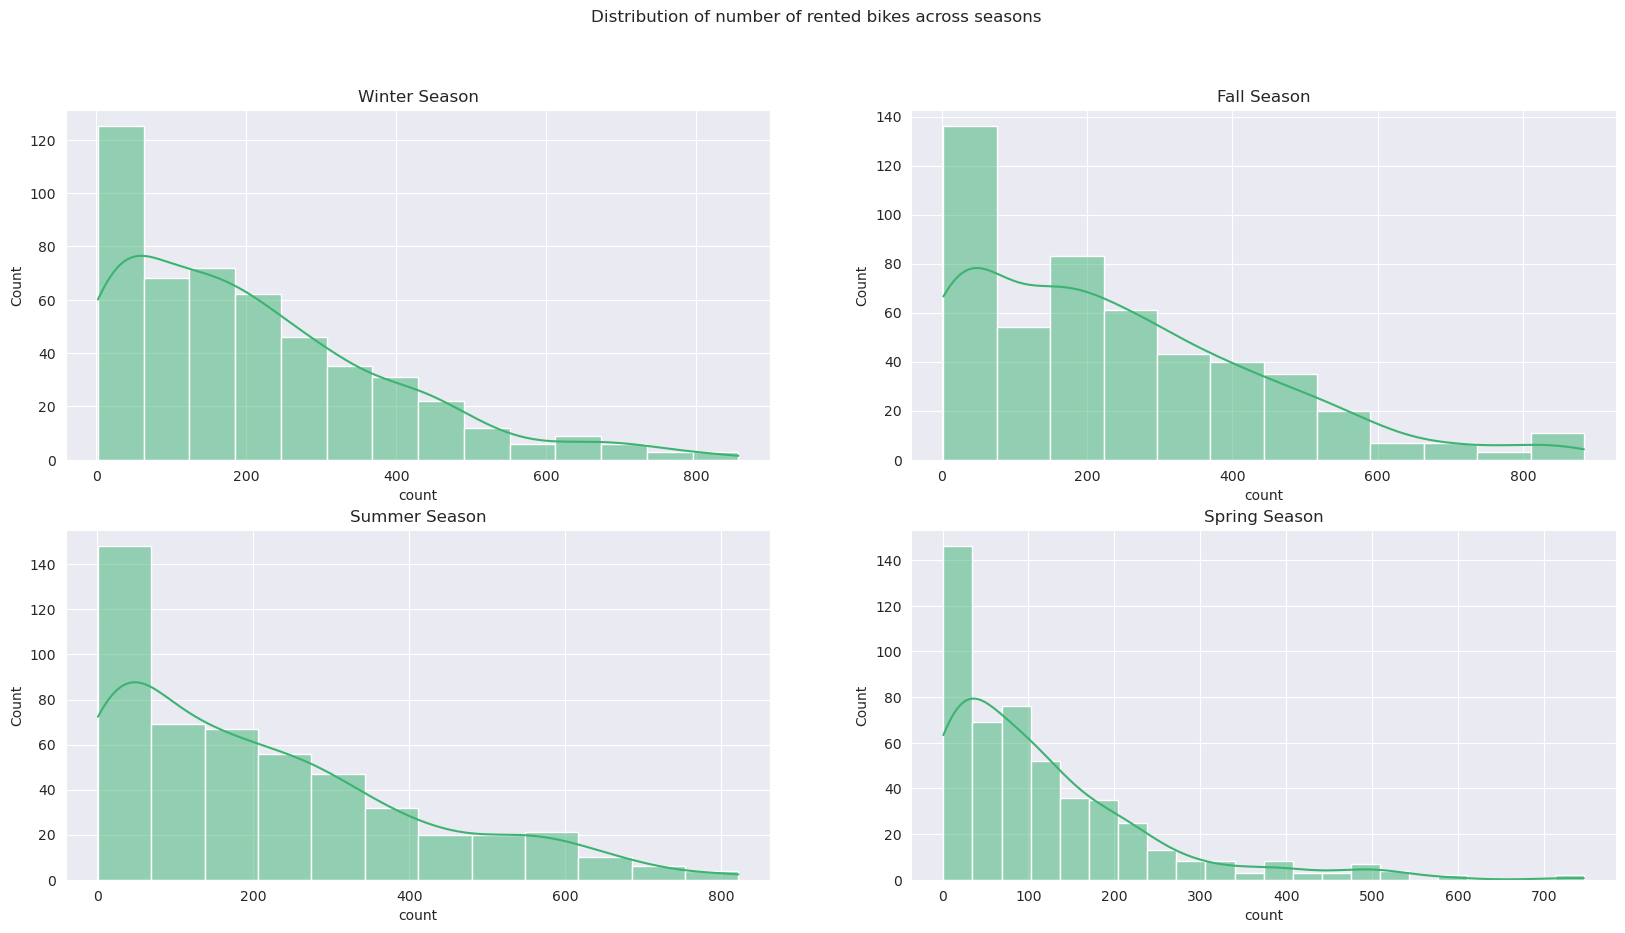

In [45]:
plt.figure(figsize=(20,10))

#histogram for winter season 
plt.subplot(2,2,1)
sns.histplot(winter_sample,kde=True,color='mediumseagreen')
plt.title('Winter Season')

#histogram for fall season 
plt.subplot(2,2,2)
sns.histplot(fall_sample,kde=True,color='mediumseagreen')
plt.title('Fall Season')

#histogram for summer season 
plt.subplot(2,2,3)
sns.histplot(summer_sample,kde=True,color='mediumseagreen')
plt.title('Summer Season')

#histogram for spring season 
plt.subplot(2,2,4)
sns.histplot(spring_sample,kde=True,color='mediumseagreen')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()

**Inference:**

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal

**Converting sample distribution to normal by applying log transformation**

In [46]:
log_winter=np.log(winter_sample)
log_fall=np.log(fall_sample)
log_summer=np.log(summer_sample)
log_spring=np.log(spring_sample)

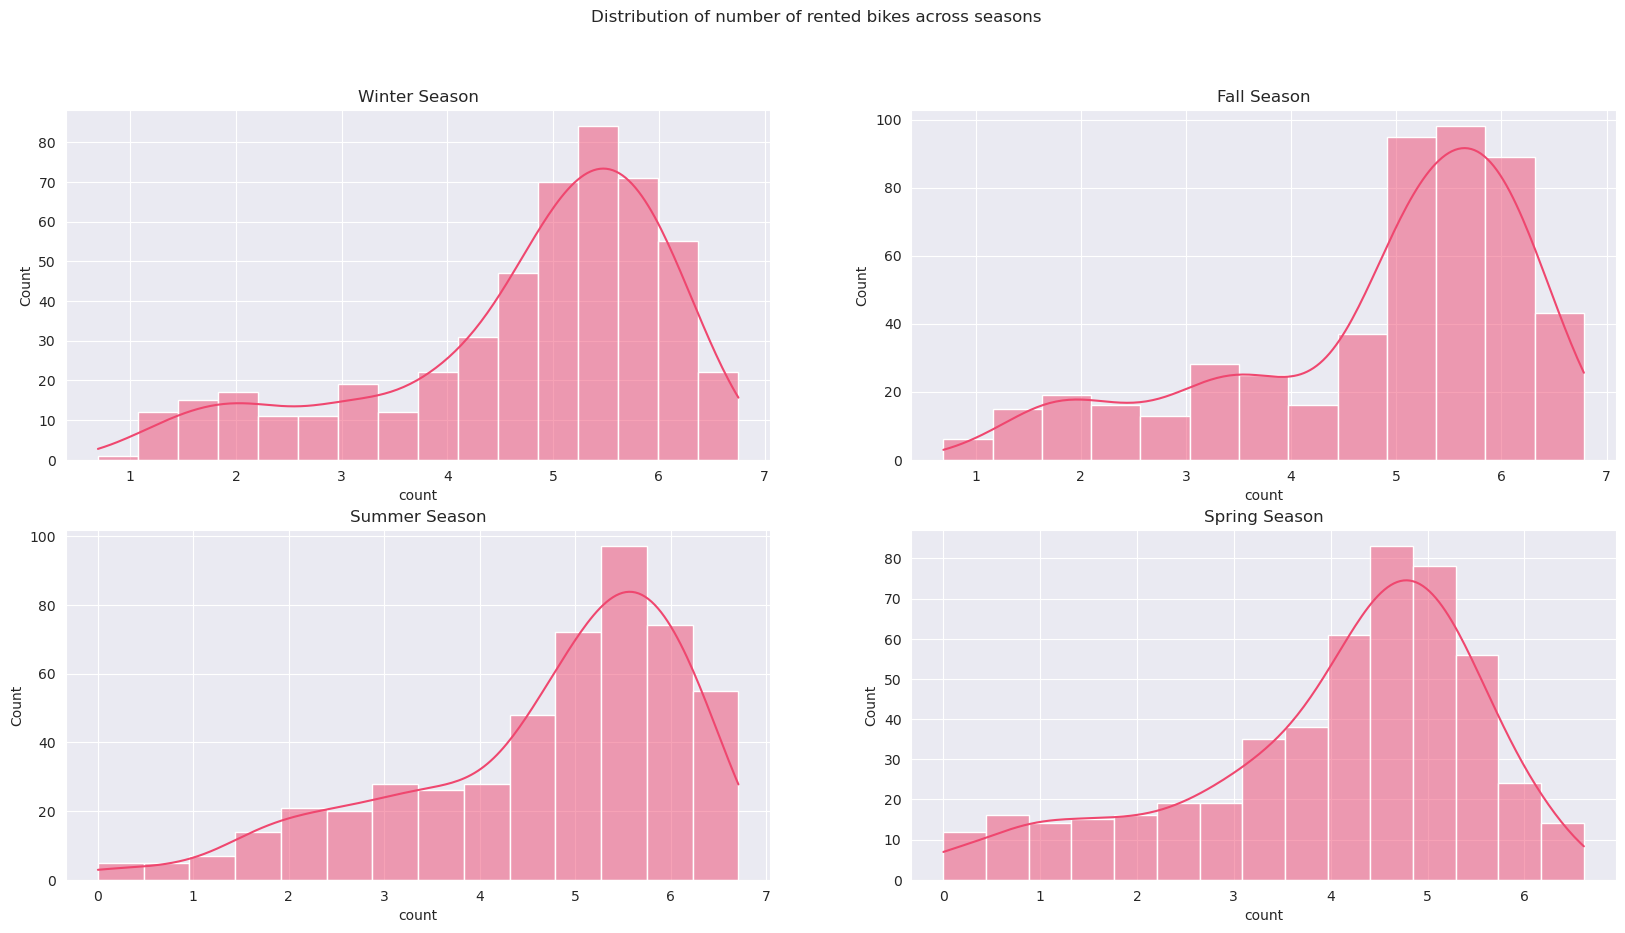

In [47]:
plt.figure(figsize=(20,10))

#histogram for winter season 
plt.subplot(2,2,1)
sns.histplot(log_winter,kde=True,color='#ef476f')
plt.title('Winter Season')

#histogram for fall season 
plt.subplot(2,2,2)
sns.histplot(log_fall,kde=True,color='#ef476f')
plt.title('Fall Season')

#histogram for summer season 
plt.subplot(2,2,3)
sns.histplot(log_summer,kde=True,color='#ef476f')
plt.title('Summer Season')

#histogram for spring season 
plt.subplot(2,2,4)
sns.histplot(log_spring,kde=True,color='#ef476f')
plt.title('Spring Season')

plt.suptitle('Distribution of number of rented bikes across seasons')
plt.show()

**Inference:**

After applying a log transformation to the samples of each season, it can be inferred that a significant improvement was observed in achieving data distributions that closely resemble normality for each of the seasons.

**We will now conduct the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step**

**Shapiro-Wilk Test for winter season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha: The sample does not follow a normal distribution***

In [48]:
test_stat,p_value= shapiro(log_winter)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8955439925193787
p value : 5.844220038457109e-18
Reject Ho: The sample does not follow a normal distribution


**Inference:**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for fall season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha: The sample does not follow a normal distribution***

In [49]:
test_stat,p_value= shapiro(log_fall)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8870638012886047
p value : 1.1289331014826517e-18
Reject Ho: The sample does not follow a normal distribution


**Inference**:

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for summer season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha: The sample does not follow a normal distribution***

In [50]:
test_stat,p_value= shapiro(log_summer)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9050089716911316
p value : 4.1234073415596673e-17
Reject Ho: The sample does not follow a normal distribution


**Inference:**

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for spring season sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha: The sample does not follow a normal distribution***

In [51]:
test_stat,p_value= shapiro(log_spring)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.920501172542572
p value : 1.3982981888325152e-15
Reject Ho: The sample does not follow a normal distribution


**Inference:**

Even after applying the log transformation, the sample does not follow a normal distribution, as demonstrated by the Shapiro-Wilk test


### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The variance is equal across all groups***
* ***Ha : The variance is not equal across the groups***

In [52]:
test_stat,p_value= levene(log_winter,log_fall,log_summer,log_spring,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 1.67453025036219
p value : 0.17044487644534673
Fail to Reject Ho: Variance is equal across all groups


**Inference**:
1. Since pvalue is not less than 0.05, we fail to reject the null hypothesis.
2. This means we do not have sufficient evidence to claim a significant difference in variance across the different seasons. Therefore, the assumption of homogeneity of variances can be considered valid.

### ANOVA Test and Final Conclusion

**2 out of 3 assumptions for ANOVA test have been satisfied. We continue to do the test since we have been instructed to do so.**

For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The mean number of cycles rented is the same across different seasons***
* ***Ha: At least one season has a mean number of cycles rented that is significantly different from the others.***

In [53]:
f_stat,p_value= f_oneway(log_winter,log_fall, log_summer,log_spring)
print("f stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is the same across different seasons ")

f stat : 33.52606991638761
p value : 3.882409388435768e-21
Reject Ho: At least one season has a mean number of cycles rented that is significantly different from the others. 


**Conclusion**:
* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* Indeed, this implies that we have gathered enough evidence to conclude that there is a significant difference in the mean number of cycles rented across all seasons.


## Are number of cycles rented similar or different in different weather conditions?

**To perform such an analyis, we use ANOVA test:**

* ANOVA, which stands for Analysis of Variance, is a statistical technique used to assess whether there is a statistically significant difference among the means of two or more categorical groups. It achieves this by testing for variations in means by examining the variance within and between these groups.

* The 4 different weather conditions are as follows:
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  

* We have to check if there is any significant difference in the number of bikes rented across different weather conditions. To analyse this, we use Annova test.

### Formulatting Null and Alternate Hypothesis

In [54]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**Inference**:

Because the weather condition "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" has only happened once in our dataset, we don't have enough information to decide if it really affects bike rentals. To prevent any skewed results, it's best to remove this rare weather type from our analysis.

We shall setup the Null and Alternate Hypothesis to check if there is any effect of weather on the number of cycles rented.

* ***H0 : The mean number of cycles rented is the same across all three different weather types.***

* ***Ha : There is at least one weather type with a mean number of cycles rented that significantly differs from the overall mean of the dependent variable.***

### Assumptions for ANOVA Test

1. The distributions of data of each group should follow the Gaussian Distribution.
2. The variance of each group should be the same or close to each other.
3. The total n observations present should be independent of each other.

### Normality Test:  Shapiro-Wilk Test

**Generate a sample of 300 data points for each weather condition**

In [55]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [56]:
sample_1= df[df['weather']==1]['count'].sample(500)
sample_2 = df[df['weather']==2]['count'].sample(500)
sample_3 = df[df['weather']==3]['count'].sample(500)


**To check the Normality we can use histogram**

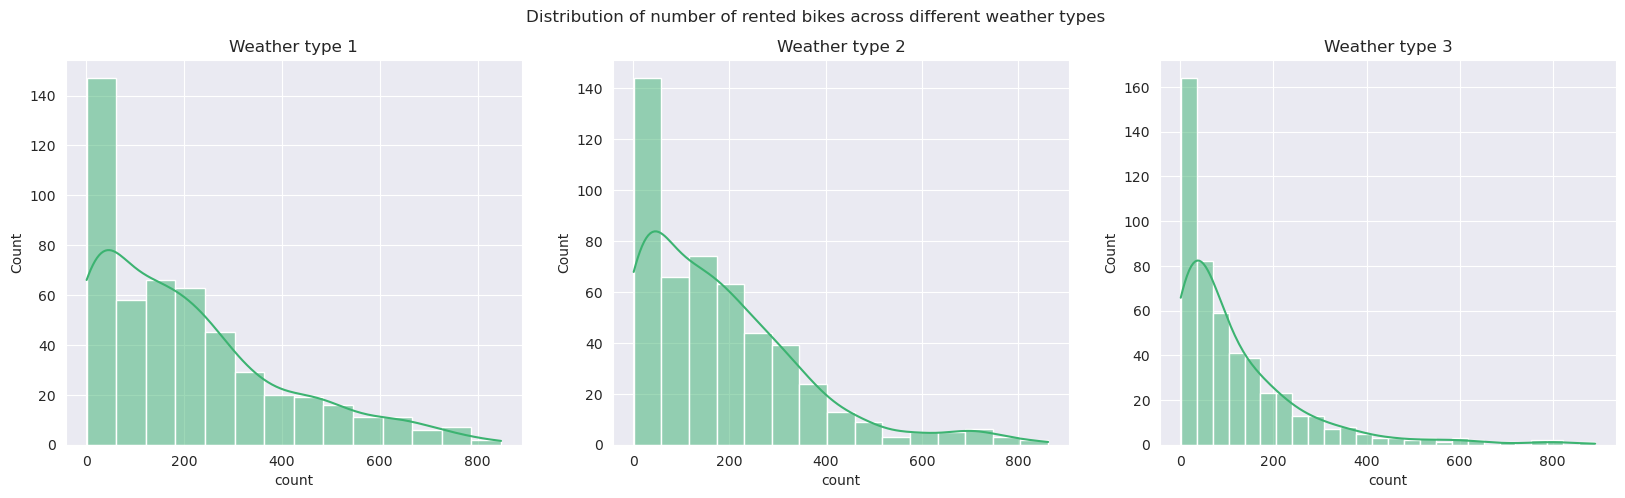

In [57]:
plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(sample_1,kde=True,color='mediumseagreen')
plt.title('Weather type 1')

#histogram for weather condition 2 
plt.subplot(1,3,2)
sns.histplot(sample_2,kde=True,color='mediumseagreen')
plt.title('Weather type 2')

#histogram for weather condition 3 
plt.subplot(1,3,3)
sns.histplot(sample_3,kde=True,color='mediumseagreen')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

**Inference**:

We see that none of the graphs are normally distributed. Hence we apply log transformation to make these distributions near to normal

**Converting sample distribution to normal by applying log transformation**

In [58]:
log_1=np.log(sample_1)
log_2=np.log(sample_2)
log_3=np.log(sample_3)


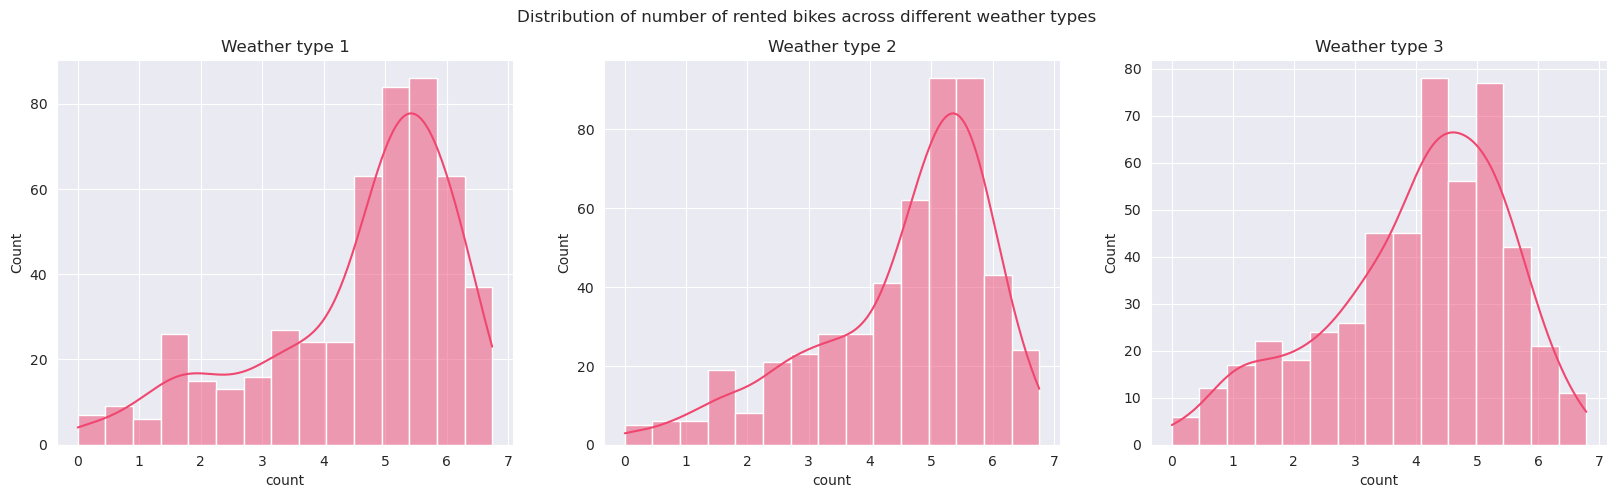

In [59]:
plt.figure(figsize=(20,5))

#histogram for weather condition 1
plt.subplot(1,3,1)
sns.histplot(log_1,kde=True,color='#ef476f')
plt.title('Weather type 1')

#histogram for weather condition 2 
plt.subplot(1,3,2)
sns.histplot(log_2,kde=True,color='#ef476f')
plt.title('Weather type 2')

#histogram for weather condition 3 
plt.subplot(1,3,3)
sns.histplot(log_3,kde=True,color='#ef476f')
plt.title('Weather type 3')

plt.suptitle('Distribution of number of rented bikes across different weather types')
plt.show()

**Inference**:

After using a log transformation on the data for each weather type, we noticed a substantial improvement in making the data look more like a normal distribution.


**We will now conduct the Shapiro-Wilk Test to assess the normality of the log-normal distribution obtained in the previous step**

**Shapiro-Wilk Test for weather type 1 sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha: The sample does not follow a normal distribution***

In [60]:
test_stat,p_value= shapiro(log_1)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.8925309181213379
p value : 3.22351436851787e-18
Reject Ho: The sample does not follow a normal distribution


**Inference**:

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for weather type 2 sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha : The sample does not follow a normal distribution***

In [61]:
test_stat,p_value= shapiro(log_2)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.909803032875061
p value : 1.1707898508207793e-16
Reject Ho: The sample does not follow a normal distribution


**Inference:**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Shapiro-Wilk Test for weather type 3 sample data**

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The sample follows a normal distribution***
* ***Ha : The sample does not follow a normal distribution***

In [62]:
test_stat,p_value= shapiro(log_3)
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: The sample does not follow a normal distribution")
else:
 print("Fail to Reject Ho:The sample follows a normal distribution")

test stat : 0.9562505483627319
p value : 5.100770847366043e-11
Reject Ho: The sample does not follow a normal distribution


**Inference:**

Even after applying the log transformation, the sample does not conform to a normal distribution, as demonstrated by the Shapiro-Wilk test.

**Final Conclusion**:

None of the weather type samples adhere to a normal distribution even after applying the log-normal transformation, indicating that the normality assumption of the ANOVA test is not met.

### Homegenity of Variance test : Levene's Test

We select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The variance is equal across all groups***
* ***Ha : The variance is not equal across the groups***

In [63]:
test_stat,p_value= levene(log_1,log_2,log_3,center='median')
print("test stat :",test_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Variance is not equal across the groups ")
else:
 print("Fail to Reject Ho: Variance is equal across all groups")

test stat : 1.3182369800636164
p value : 0.2679171413335979
Fail to Reject Ho: Variance is equal across all groups


**Inference:**

1. Since pvalue is not less than 0.05, we fail to reject the null hypothesis.
2. This means we do not have sufficient evidence to claim a significant difference in variance across the different weather types. Therefore, the assumption of homogeneity of variances can be considered valid.

### ANOVA Test and final Conclusion

**2 out of 3 assumptions for ANOVA test have been satisfied. We continue to do the test since we have been instructed to do so.**

For ANOVA Test we select the level of signifiance as 5% and the null and alternate hypothesis is as follows:

* ***H0 : The mean number of cycles rented is equal across different weather conditions.***
* ***Ha: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.***

In [64]:
f_stat,p_value= f_oneway(log_winter,log_fall, log_summer,log_spring)
print("test stat :",f_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others ")
else:
 print("Fail to Reject Ho: The mean number of cycles rented is equal across different weather conditions")

test stat : 33.52606991638761
p value : 3.882409388435768e-21
Reject Ho: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others 


**Final Conclusion:**
* Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
* Indeed, this indicates that we have collected sufficient evidence to conclude that there is a significant difference in the mean number of cycles rented across all weather conditions.
* Additionally, this suggests that weather conditions do have a notable effect on the number of cycles rented.

### Is weather type dependent on the season

**To perform such an analysis we perform Chi square test**

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables

The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables.

Also it is important to know that Chi-Square test is non parametric test meaning that it is distribution free (need not have gaussian distribution)

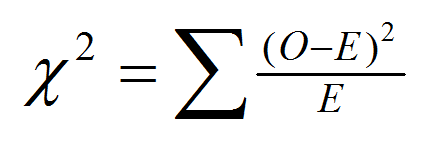

where 

* O : Observed value of the variables
* E : Expected value of the variables
* X^2 : The value of Chi Square

### Assumptions of Chi-Square Test


* **Both variables are categorical**: 


> In this dataset, season column has already been converted into categorical data and the weather column is nominal data. Hence it is safe to say that the above condition is satisfied.

* **All observations are independent**:


> We are hoping that the sample provided by YULU has been obtained from random sampling upon which the condition is satisfied.

* **Cells in the contingency table are mutually exclusive**


> Assuming each individual in the dataset was only surveyed once, this assumption should be met.

* **Expected value of cells should be 5 or greater in at least 80% of cells and none less than 1**


> We shall check for this condition after the pearson chi-square test has been completed.

In [65]:
data=pd.crosstab(df['weather'],df['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


As previously mentioned, there is only one row in our dataset for weather type 4. We lack sufficient information to determine if it truly correlates with the season. To avoid potential biases and skewed results, it's advisable to exclude this rare weather type from our analysis.

In [66]:
df_removed_weather=df[~(df['weather']==4)]

In [67]:
data=pd.crosstab(df_removed_weather['weather'],df_removed_weather['season'])
data

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225


In [68]:
x_stat,p_value,dof,expected=chi2_contingency(data)

In [69]:
expected.min()

211.88929719797886

In [70]:
(len(expected[expected<5])/len(expected))*100

0.0

**Inference:**

All of the data points have expected values greater than 5, indicating that the assumption related to the expected values being greater than 5 is satisfied for the chi-square test.

### Chi-Square Test and Final Conclusion

We shall setup Null and alternate Hypotheis to check if Weather is dependent on season

* ***H0:  Weather is not dependent on the season***
* ***Ha:  Weather is dependent on the season, meaning they are associated or related***

We consider level of significance as 0.05

In [71]:
x_stat,p_value,dof,expected=chi2_contingency(data)
print("X stat :",x_stat)
print("p value :",p_value)
alpha = 0.05
if p_value< alpha:
 print("Reject Ho: Weather is dependent on the season")
else:
 print("Fail to Reject Ho: Weather is not dependent on the season")

X stat : 46.101457310732485
p value : 2.8260014509929403e-08
Reject Ho: Weather is dependent on the season


**Final Conclusion**

1. Since the p-value obtained from our test is less than the predetermined alpha level of 0.05, we have sufficient evidence to reject the null hypothesis for this test.
2. Indeed, this suggests that we have gathered enough evidence to conclude that there is a dependence between weather and the season.

# Insights

1. On working days, 68.6% of cycles are rented, whereas on non-working days, 31.4% of cycles are rented.
2. **Despite the fact that 68.6% of cycles are rented on working days compared to 31.4% on non-working days, our t-test analysis does not provide sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This finding suggests that there is no statistically significant difference in the number of cycles rented between working days and non-working days.**
3. During the fall season, approximately 30.7% of cycles are rented.
4. In the summer season, around 28.2% of cycles are rented.
5. The winter season records a rental rate of about 26.1% for cycles.
6. The lowest rental rate, at just 15%, is observed in the spring season.
7.  **The ANOVA test results indicate a clear and statistically significant difference in the mean number of cycles rented across all seasons. This underscores the notion that the season plays a substantial role in influencing the number of bikes rented.**
8. Weather condition 1 experiences the highest rental rate, with approximately 70.8% of cycles rented.
9. In weather condition 2, around 24.3% of cycles are rented.
10. Weather condition 3 has a rental rate of approximately 4.9% for cycles.
11. Weather condition 4 exhibits an exceptionally low rental rate, with only 0.00786% of cycles being rented.
12. **The ANOVA test results indicate a significant difference in the mean number of cycles rented across all weather conditions, which strongly suggests that weather types have a significant effect on the number of cycles rented.**
13. **The chi-square test results reveal a statistically significant association between weather type and the season.**
14. The highest average count of rental bikes is observed at 5 PM, closely followed by 6 PM and 8 AM. This indicates distinct peak hours during the day when cycling is most popular.
15. Conversely, the lowest average count of rental bikes occurs at 4 AM, with 3 AM and 5 AM also showing low counts. These hours represent the early morning period with the least demand for cycling.
16. Notably, there is an increasing trend in cycle rentals between 5 AM and 8 AM, suggesting a surge in demand during the early morning hours as people start their day.
17. Additionally, there is a decreasing trend in cycle rentals from 5 PM to 11 PM, indicating a gradual decline in demand as the day progresses into the evening and nighttime.
18. The highest average hourly count of rental bikes occurs in June, July, and August, reflecting the peak demand during summer.
19. Conversely, the lowest average hourly count of rental bikes is found in January, February, and March, which are the winter months with reduced cycling activity.
20. Notably, there is an increasing trend in average bike rentals from February to June, corresponding to the shift from winter to spring and summer.
21. Conversely, a decreasing trend in average bike rentals is observed from October to December due to the onset of winter.
22. The weak positive correlation of 0.39 between temperature and the number of bikes rented suggests that, on average, fewer people prefer to use electric cycles during the daytime between 12 PM to 3 PM. This observation aligns with our univariate analysis, where we discovered that the average number of cycles rented during this time frame was lower compared to other times of the day. A similar correlation pattern is also observed in the case of "feels-like" temperature, reinforcing this trend.
23. The negative correlation between humidity and the number of cycles rented indicates that people tend to avoid using electric bikes during high humidity conditions. This avoidance can be attributed to the discomfort caused by the heavy and sticky air, leading to sweating and a general sense of unease. Moreover, the reduced efficiency of electric bikes in high humidity, resulting in increased air resistance and potential battery performance issues, contributes to the preference for alternative transportation or indoor activities in such conditions.
24. The presence of a weak positive correlation between windspeed and the number of cycles rented indicates that there is a subset of individuals who appear to favor using electric cycles during windy conditions for the sheer enjoyment of the experience. While this preference contributes to a slight increase in bike rentals on windier days, it's essential to recognize that this effect is not particularly strong, as indicated by the weak correlation. This suggests that the enjoyment of cycling in windy conditions is a relatively niche preference among riders.

# Recommendations

**Actionable Insight : Despite the fact that 68.6% of cycles are rented on working days compared to 31.4% on non-working days, our t-test analysis does not provide sufficient evidence to conclude that working days have a significant effect on the number of cycles rented. This finding suggests that there is no statistically significant difference in the number of cycles rented between working days and non-working days.**

**Recommendations:**

1.  Yulu can consider adjusting its fleet allocation and marketing efforts to better align with customer demand. While working days might not significantly impact rentals, Yulu can focus on peak hours within both working and non-working days to ensure bikes are available when and where they are needed most.
2. Yulu can engage with users through notifications and alerts to inform them of bike availability and incentives during specific timeframes, encouraging rentals during periods with lower demand.

**Actionable Insight : The ANOVA test results indicate a clear and statistically significant difference in the mean number of cycles rented across all seasons. This underscores the notion that the season plays a substantial role in influencing the number of bikes rented.**

**Recommendations**:

1. Yulu can introduce season-specific promotions and discounts to incentivize bike rentals during peak seasons. For example, offering discounts during summer to encourage more rides can attract additional customers.
2. Ensure that bike availability is well-managed to meet the increased demand during peak seasons. This includes bike maintenance, distribution, and tracking to prevent shortages or excess bikes.
3. During seasons with adverse weather conditions, such as rain or snow, Yulu can provide weather-ready bikes equipped with features like fenders and all-weather tires. This ensures that riders are comfortable and safe during inclement weather.


**Actionable Insight : The ANOVA test results indicate a significant difference in the mean number of cycles rented across all weather conditions, which strongly suggests that weather types have a significant effect on the number of cycles rented.**

**Recommendations:**

1. During seasons with adverse weather conditions, such as rain or snow, Yulu can provide weather-ready bikes equipped with features like fenders and all-weather tires. This ensures that riders are comfortable and safe during inclement weather.
2. During adverse weather, prioritize rider safety by providing guidelines and recommendations for riding in specific conditions. Ensure bikes are well-maintained and equipped with safety features.

**Actionable Insight: The lowest average count of rental bikes occurs from 1 am to 4 am.**

**Recommendations:**

1. Designate the hours from 1 am to 4 am as the primary maintenance window. During this time, perform routine checks and maintenance on the bikes, ensuring they are in optimal condition for the next day's rentals. This includes inspecting brakes, tires, gears, and electric components (if applicable).
2. As a significant number of bikes are likely to be unused during these hours, Yulu can capitalize on this downtime to charge electric bike batteries. Implement a comprehensive battery charging program, ensuring that all electric bikes are fully charged and ready for use during peak hours.
3. After maintenance and charging, strategically deploy bikes to high-demand areas in preparation for the morning rush. Ensure that bikes are available at key locations, such as transportation hubs, offices, and residential areas.
4. Use data analytics to fine-tune this strategy over time. Analyze bike utilization patterns, maintenance needs, and charging efficiency to continually optimize the process.
5. By leveraging this off-peak time for maintenance and charging, Yulu can enhance bike availability during peak hours, improve customer satisfaction, and maximize operational efficiency.